# **Processing Text - Final Project**

**06. Visualization**

SENTIMENT AND PUBLIC OPINION ANALYSIS ON THE NEW MINISTER OF FINANCE, PURBAYA YUDHI SADEWA, ON THE YOUTUBE PLATFORM USING INDOBERT, K-MEANS CLUSTERING, AND MACHINE LEARNING REGRESSORS

The Member of the Group 5 of Final Project

- Abdullah Al-Firdaus Nuzula 	(24031554008)
- Halilatunnisa 			        (24031554130)
- Elvira Tiara Suci Tambunan 	(24031554213)

Lecturer: Ulfa Siti Nuraini, S.Stat., M.Stat.

## **Install Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **Load The Data**

In [ ]:
path_sentiment = "/content/drive/MyDrive/Akademik - UNESA /Semester 3/Processing Text/008_130_213_Group5_PemteksFinalProject/Cleaning Data Result/Cleaning_Data_IndoBERT_Sentiment_Label.xlsx"
path_topic     = "/content/drive/MyDrive/Akademik - UNESA /Semester 3/Processing Text/008_130_213_Group5_PemteksFinalProject/Cleaning Data Result/Cleaning_Data_KMeans.xlsx"
path_forecast  = "/content/drive/MyDrive/Akademik - UNESA /Semester 3/Processing Text/008_130_213_Group5_PemteksFinalProject/Dataset After Method/Hasil_Forecasting_Prophet.xlsx"

In [ ]:
df_sent = pd.read_excel(path_sentiment)
df_topic = pd.read_excel(path_topic)
df_forecast = pd.read_excel(path_forecast)

df_sent['published_at'] = pd.to_datetime(df_sent['published_at']).dt.tz_localize(None)
df_forecast['ds'] = pd.to_datetime(df_forecast['ds'])

#### **Visualization for Linear Regression : Prophet**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.offline as py

df_forecast = pd.read_excel(path_forecast)
print(f"Membaca file hasil forecast: {path_forecast}...")

Membaca file hasil forecast: /content/drive/MyDrive/Akademik - UNESA /Semester 3/Processing Text/008_130_213_Group5_PemteksFinalProject/Dataset After Method/Hasil_Forecasting_Prophet.xlsx...


In [ ]:
df_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2025-07-15,0.528261,-0.040415,0.947765,0.528261,0.528261,-0.030578,-0.030578,-0.030578,-0.030578,-0.030578,-0.030578,0,0,0,0.497683
1,2025-07-16,0.527304,0.084682,1.059534,0.527304,0.527304,0.042962,0.042962,0.042962,0.042962,0.042962,0.042962,0,0,0,0.570266
2,2025-07-17,0.526346,0.004447,0.970404,0.526346,0.526346,-0.031880,-0.031880,-0.031880,-0.031880,-0.031880,-0.031880,0,0,0,0.494467
3,2025-07-18,0.525389,0.148217,1.154761,0.525389,0.525389,0.117368,0.117368,0.117368,0.117368,0.117368,0.117368,0,0,0,0.642756
4,2025-07-19,0.524432,-0.079484,0.898781,0.524432,0.524432,-0.122561,-0.122561,-0.122561,-0.122561,-0.122561,-0.122561,0,0,0,0.401870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2025-11-17,0.408567,-0.116958,0.914458,0.408567,0.408567,0.028440,0.028440,0.028440,0.028440,0.028440,0.028440,0,0,0,0.437008
110,2025-11-18,0.407610,-0.148764,0.871650,0.407610,0.407610,-0.030578,-0.030578,-0.030578,-0.030578,-0.030578,-0.030578,0,0,0,0.377031
111,2025-11-19,0.406652,-0.074810,0.966129,0.406652,0.406652,0.042962,0.042962,0.042962,0.042962,0.042962,0.042962,0,0,0,0.449614
112,2025-11-20,0.405694,-0.142041,0.851078,0.405694,0.405695,-0.031880,-0.031880,-0.031880,-0.031880,-0.031880,-0.031880,0,0,0,0.373815


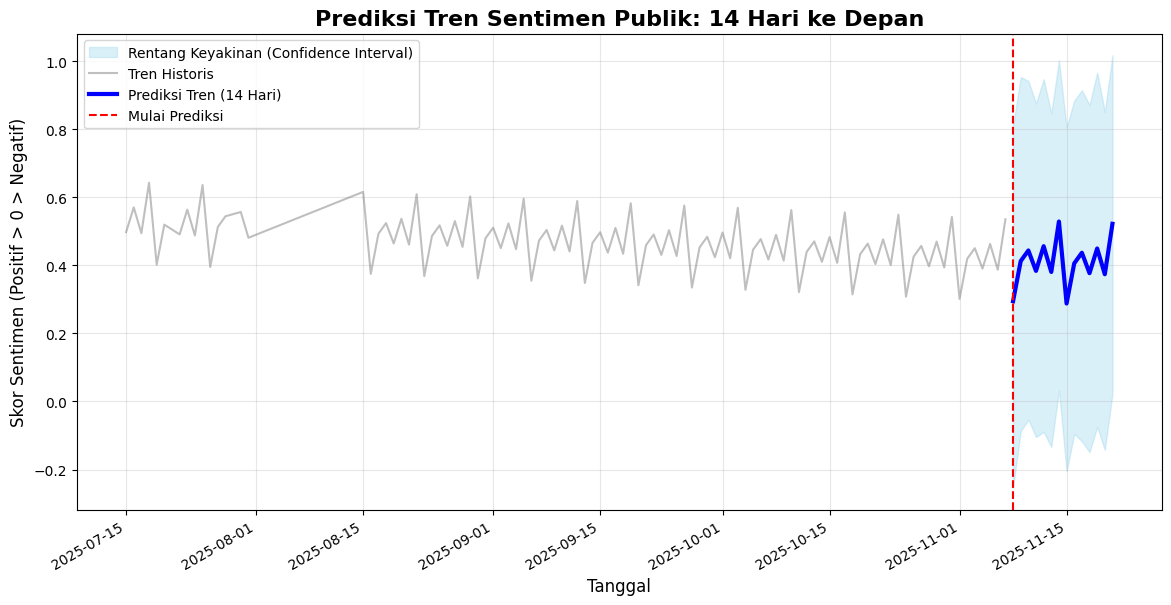

In [ ]:
# Visualisasi Fokus Tren & Prediksi (Zoom-In)
tanggal_mulai_prediksi = pd.Timestamp("2025-11-08")

forecast_future = df_forecast[df_forecast['ds'] >= tanggal_mulai_prediksi]
forecast_history = df_forecast[df_forecast['ds'] < tanggal_mulai_prediksi]

plt.figure(figsize=(14, 7))

plt.fill_between(forecast_future['ds'],
                 forecast_future['yhat_lower'],
                 forecast_future['yhat_upper'],
                 color='skyblue', alpha=0.3, label='Rentang Keyakinan (Confidence Interval)')

# Plot Garis Tren Utama
# History
plt.plot(forecast_history['ds'], forecast_history['yhat'],
         color='grey', linestyle='-', alpha=0.5, label='Tren Historis')
# Predcition
plt.plot(forecast_future['ds'], forecast_future['yhat'],
         color='blue', linewidth=3, label='Prediksi Tren (14 Hari)')

# Plot Garis Batas "Hari Ini"
plt.axvline(x=tanggal_mulai_prediksi, color='red', linestyle='--', linewidth=1.5, label='Mulai Prediksi')

plt.title('Prediksi Tren Sentimen Publik: 14 Hari ke Depan', fontsize=16, fontweight='bold')
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Skor Sentimen (Positif > 0 > Negatif)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)

# Format Tanggal Sumbu X agar rapi
plt.gcf().autofmt_xdate()
plt.show()


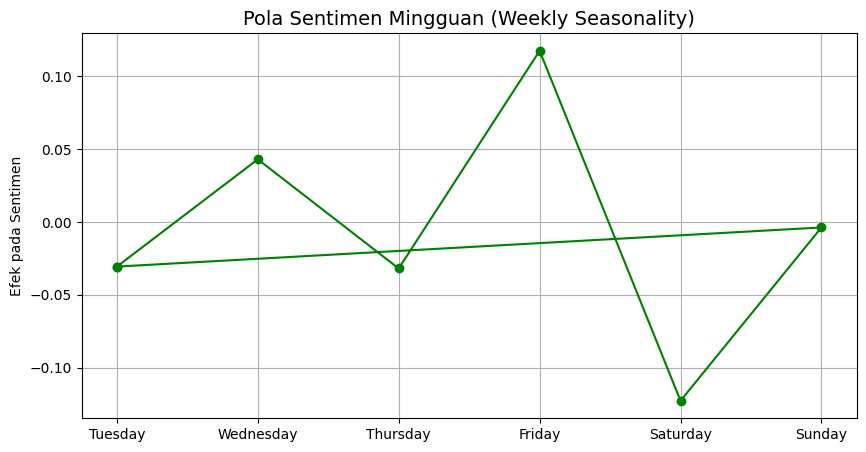

Grafik di atas menunjukkan hari apa sentimen cenderung naik/turun secara alami.


In [ ]:
# Analisis Komponen
if 'weekly' in df_forecast.columns:
    plt.figure(figsize=(10, 5))
    weekly_pattern = df_forecast.sort_values('ds').iloc[:7]
    days = weekly_pattern['ds'].dt.day_name()

    plt.plot(days, weekly_pattern['weekly'], marker='o', color='green')
    plt.title('Pola Sentimen Mingguan (Weekly Seasonality)', fontsize=14)
    plt.ylabel('Efek pada Sentimen')
    plt.grid(True)
    plt.show()
    print("Grafik di atas menunjukkan hari apa sentimen cenderung naik/turun secara alami.")

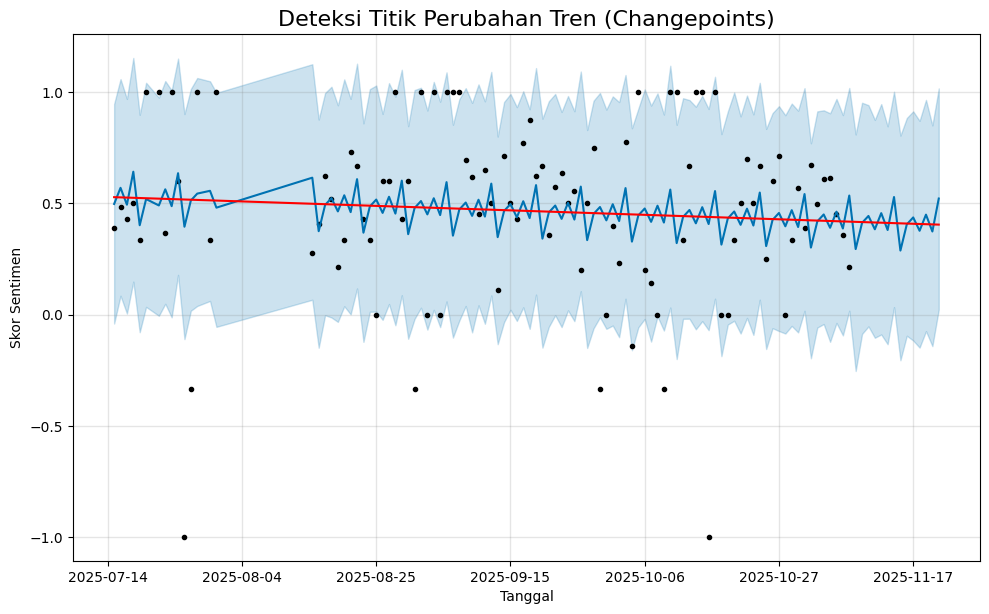

In [ ]:
from prophet.plot import add_changepoints_to_plot

fig = m.plot(df_forecast)
# Menambahkan garis merah putus-putus di titik perubahan tren
a = add_changepoints_to_plot(fig.gca(), m, df_forecast)

plt.title('Deteksi Titik Perubahan Tren (Changepoints)', fontsize=16)
plt.ylabel('Skor Sentimen')
plt.xlabel('Tanggal')
plt.show()

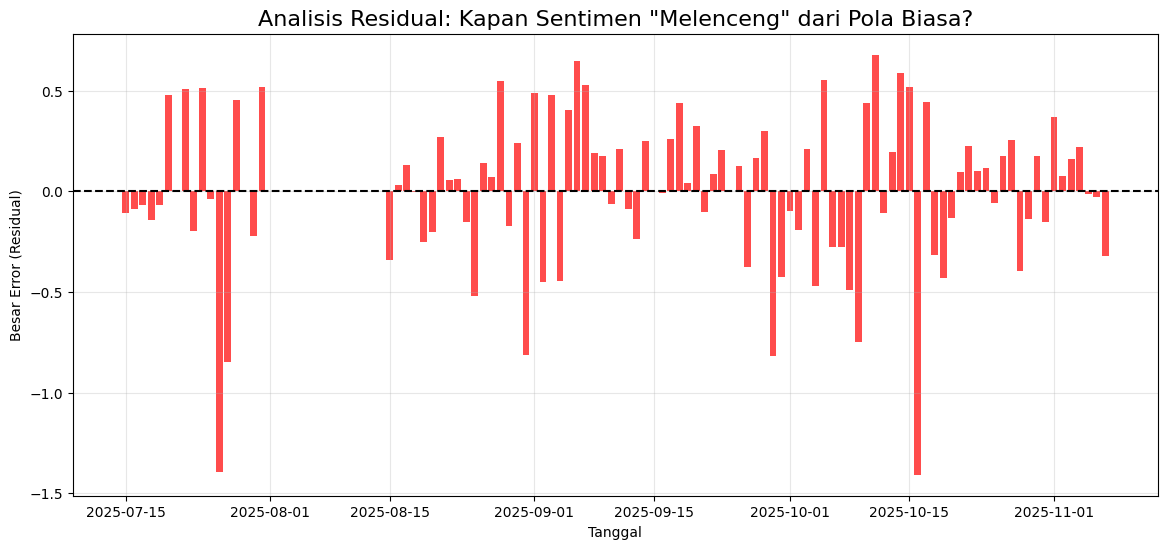

In [ ]:
# Hitung Residual
comparison_df['residual'] = comparison_df['y'] - comparison_df['yhat']

plt.figure(figsize=(14, 6))

# Plot Residual
plt.bar(comparison_df.index, comparison_df['residual'], color='red', alpha=0.7)
plt.axhline(0, color='black', linestyle='--')

plt.title('Analisis Residual: Kapan Sentimen "Melenceng" dari Pola Biasa?', fontsize=16)
plt.xlabel('Tanggal')
plt.ylabel('Besar Error (Residual)')
plt.grid(True, alpha=0.3)
plt.show()

#### **Visualization for TF-IDF and K-means**